In [61]:
import pandas as pd

In [62]:
# leer archivo csv
df_netflix = pd.read_csv('netflix_titles.csv')
# tipo de dato
df_netflix.dtypes
# forma del dataframe
df_netflix.shape

(8807, 12)

# Identificar data faltante 

In [63]:
# numero de filas faltantes en cada columna NAn
df_netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [64]:
# % de filas faltantes en cada columna
for column in df_netflix.columns:
    percenteage = df_netflix[column].isnull().mean()
    print(column +' : '+ str(round(percenteage*100,2)))

show_id : 0.0
type : 0.0
title : 0.0
director : 29.91
cast : 9.37
country : 9.44
date_added : 0.11
release_year : 0.0
rating : 0.05
duration : 0.03
listed_in : 0.0
description : 0.0


# Manejo de Data Faltante 

In [65]:
# eliminar columna o fila con .drop, .dropna or .isnull

# eliminar columna con valores nulos 
 #df_netflix.drop('director',axis=1)
# eliminar fila q son nulos
#   obtenermos index con valores nulos
no_director = df_netflix[df_netflix['director'].isnull()].index
#   las borramos
df_netflix.drop(no_director,axis=0)
# ~ + .isnull()
df_netflix[~(df_netflix['director'].isnull())]
# dropna() 
df_netflix.dropna(subset=['director']).isnull().sum()

show_id           0
type              0
title             0
director          0
cast            473
country         422
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

In [66]:
# reemplazar por la media, mediana (data numerica) 
# y moda (data categorica)
#   junta a los valores con ''
 # mean() o mode()
moda = ''.join(df_netflix['rating'].mode())
df_netflix['rating'].fillna(moda,inplace=True)
# ya no hay valores nullos
df_netflix['rating'].isnull().sum()

0

In [67]:
# reemplazar por numero arbitrario con .fillna()
df_netflix['duration'].fillna('0',inplace=True)
df_netflix['duration'].isnull().sum()
# backward,forward : reemplazar valores nulos basado en la 
# data de la fila siguiente o la anterior
df_netflix.fillna(method='bfill') # fila anterior
df_netflix.fillna(method='ffill') # fila siguiente 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [68]:
# extraer data de columna "duration" con metodos split()
# y extract()
df_movie = df_netflix[df_netflix['type']=='Movie']
df_movie['minute'] = df_movie['duration'].str.split(expand=True)[0].astype(int)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15452\3561428478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['minute'] = df_movie['duration'].str.split(expand=True)[0].astype(int)


In [69]:
df_movie.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
minute           int32
dtype: object

In [70]:
# cada vez q se encuentre una coma se va a separar por elementos
# df_netflix['date_added'].str.split(pat='\d{4}',expand=True)
df_netflix['date_added'].str.extract('(\d{4})')

,0
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
8802,2019
8803,2019
8804,2019
8805,2020


# Identificar Valores Atipicos 

####  usar histograma para identificar valores atipicos dentro de data numerica

<Axes: ylabel='Frequency'>

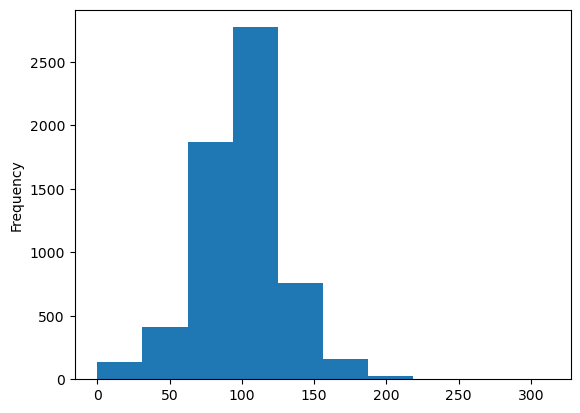

In [71]:
# hacer histograma con pandas
df_movie['minute'].plot(kind="hist",bins=10)

In [72]:
# obtener rangos de las barras con el metodo value_counts y el 
# numero de 
df_movie['minute'].value_counts(bins=10).sort_index()

minute
(-0.313, 31.2]     135
(31.2, 62.4]       410
(62.4, 93.6]      1867
(93.6, 124.8]     2772
(124.8, 156.0]     766
(156.0, 187.2]     150
(187.2, 218.4]      22
(218.4, 249.6]       6
(249.6, 280.8]       2
(280.8, 312.0]       1
Name: count, dtype: int64

In [73]:
# manejo de valores atipicos
df_movie[~((df_movie['minute']>31.2)& (df_movie['minute']<218))] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States","September 1, 2021",1984,R,229 min,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,229
694,s695,Movie,Aziza,Soudade Kaadan,"Caress Bashar, Abdel Moneim Amayri","Lebanon, Syria","June 17, 2021",2019,TV-PG,13 min,"Comedies, Dramas, Independent Movies",This short film follows a newly displaced Syri...,13
695,s696,Movie,Besieged Bread,Soudade Kaadan,"Lama Hakeim, Gabriel Malki, Ehab Shaaban",NaN,"June 17, 2021",2015,TV-14,12 min,"Dramas, International Movies","In battle-ridden Syria, a woman trying to smug...",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,s7789,Movie,Power Rangers: Megaforce: The Robo Knight Befo...,James Barr,"Andrew M. Gray, Ciara Hanna, John Mark Louderm...",United States,"January 1, 2016",2013,TV-Y7,24 min,Children & Family Movies,Robo Knight learns the meaning of Christmas fr...,24
7848,s7849,Movie,Refugee,"Clementine Malpas, Leslie Knott","Cate Blanchett, Lynsey Addario, Omar Victor Di...",NaN,"March 10, 2017",2016,TV-PG,24 min,Documentaries,Five acclaimed photographers travel the world ...,24
7891,s7892,Movie,Room on the Broom,"Max Lang, Jani Lachauer","Simon Pegg, Gillian Anderson, Rob Brydon, Mart...","United Kingdom, Germany","July 1, 2019",2012,TV-Y7,26 min,"Children & Family Movies, Independent Movies",A gentle witch with a ginger braid offers ride...,26
7932,s7933,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",1964,TV-14,228 min,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...,228


#### usar boxplot para identificar valores atipicos dentro de data numerica 

<Axes: >

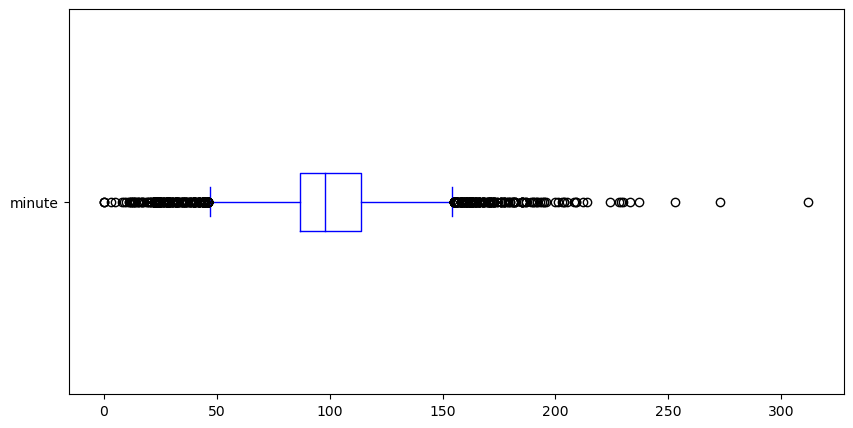

In [74]:
# hacer boxplot con pandas
df_movie['minute'].plot(kind='box',vert=False,color='blue',
                       figsize=(10,5))

In [75]:
# rivision a valores estadisticos
# IQR = Q3-Q1
min_boxplot = 87 - 1.5*(114-87)   # Q1 - 1.5*IQR 
max_boxplot = 114 + 1.5*(114-87)  # Q3 - 1.5*IQR
print(min_boxplot)
print(max_boxplot)
# df_movie['minute'].describe()


46.5
154.5


In [76]:
# manejar valores atipicos
df_movie[~((df_movie['minute']>46.5)& (df_movie['minute']<154.5))] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,45
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,191
8770,s8771,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...,171
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",157


#### Usar grafico de barras para identificar valores atipicos dentro de data categorica 

In [77]:
# hacer barplot con pandas
df_movie['rating'].value_counts()

rating
TV-MA       2064
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

<Axes: xlabel='rating'>

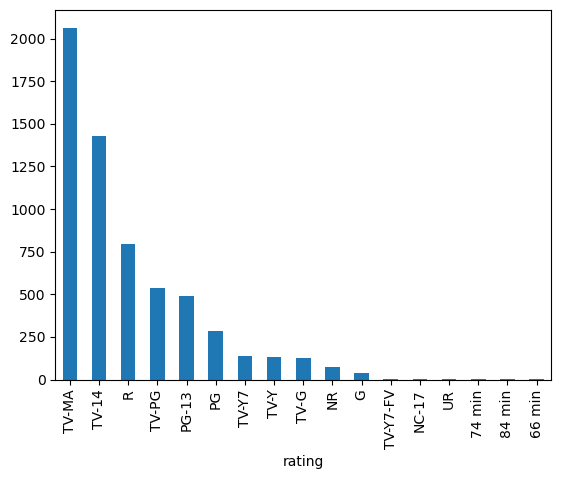

In [78]:
df_movie['rating'].value_counts().plot(kind='bar')

## Normalizacion de texto 

#### Manejar inconsistencia en mayusculas / minusculas:
     lower(),upper(),title()

In [79]:
# cambiar mayusculas/minuscula con el atributo str
df_movie['title'].str.lower()
df_movie['title'].str.upper()
df_movie['title'].str.title()
# actualizar valores
df_movie['title'] = df_movie['title'].str.upper()
# cambiar mayusculas/minuscula con el metodo apply
df_movie['title'] = df_movie['title'].apply(lambda x:x.title())

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15452\3993052385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title'] = df_movie['title'].str.upper()
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15452\3993052385.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title'] = df_movie['title'].apply(lambda x:x.title())


In [80]:
df_movie['title']

0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 6131, dtype: object

## Eliminar espacios en blanco con strip(), Istrip() y rstrip() 

In [81]:
# como el metodo strip() funciona
movie_title = ' Titanic      '
movie_title
# eliminar espacios delanteros con lstrip()
movie_title.lstrip()
# eliminar espacios finales con rstrip()
movie_title.rstrip()
# eliminar espacios delanteros y finales con strip()
movie_title.strip()

'Titanic'

In [59]:
# eliminar espacios delanteros y finales con el metodo strip()
# df_movie['title'] = df_movie['title'].str.strip()
# eliminar espacios delanteros y finales con el metodo apply()
# df_movie['title'].apply(lambda x:x.strip())

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15452\371974222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title'] = df_movie['title'].str.strip()


## Reemplazar cadenas de texto con replace() o sub() 

\w -> a-z A-Z 0-9
\s -> espacios blanco 
cualquiera q no sea estos dos son signos de puntuacion
[^\w\s]

In [85]:
# eliminar signos de puntuacion con el metodo str.replace() y regex
df_movie['title'].str.replace('[^\w\s]','',regex=True)
# eliminar puntuacion con el metodo replace() y regex
df_movie['title'].replace('[^\w\s]','',regex=True)
# diferencia entre str.replace() y replace()
#    .str.replace es solo para cadena de texto
#    .replace es para todo
# eliminar puntuacion con la funcion re.sub() con el metodo apply
import re
df_movie['title'].apply(lambda x:re.sub('[^\w\s]','',x))

0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 6131, dtype: object